## Name and ID

Kenny Yau

## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/spring2021/comp135).

#### Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

# from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [2]:
# Load data
x_tr_N2 = np.loadtxt('data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [3]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list

n_runs = 16
mlprelulbfgs_list = []
total_time = 0

for ii in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=9000, tol=1e-6,
        random_state=ii,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    converged = mlp_lbfgs.n_iter_ < mlp_lbfgs.max_iter
    elapsed_time_sec = time.time() - start_time_sec
    total_time += elapsed_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        ii+1, n_runs, elapsed_time_sec,
        #len(mlp_lbfgs.loss_curve_),
        mlp_lbfgs.n_iter_,
        'converged   ' if converged else 'NOT converged',
        mlp_lbfgs.loss_))

    mlprelulbfgs_list.append(mlp_lbfgs)
    
mean_elapsed = total_time / n_runs
print(f'mean time to finish a run: {mean_elapsed}')



finished LBFGS run  1/16 after    1.8 sec | 1841 iters | converged    | loss 0.347
finished LBFGS run  2/16 after    1.9 sec | 1930 iters | converged    | loss 0.478
finished LBFGS run  3/16 after    1.7 sec | 1738 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    2.3 sec | 2334 iters | converged    | loss 0.347
finished LBFGS run  5/16 after    1.6 sec | 1595 iters | converged    | loss 0.347
finished LBFGS run  6/16 after    2.7 sec | 2851 iters | converged    | loss 0.001
finished LBFGS run  7/16 after    2.9 sec | 2952 iters | converged    | loss 0.001
finished LBFGS run  8/16 after    2.0 sec | 2107 iters | converged    | loss 0.478
finished LBFGS run  9/16 after    1.7 sec | 1690 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    3.1 sec | 3162 iters | converged    | loss 0.000
finished LBFGS run 11/16 after    2.1 sec | 2211 iters | converged    | loss 0.478
finished LBFGS run 12/16 after    1.6 sec | 1629 iters | converged    | loss 0.478
fini

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

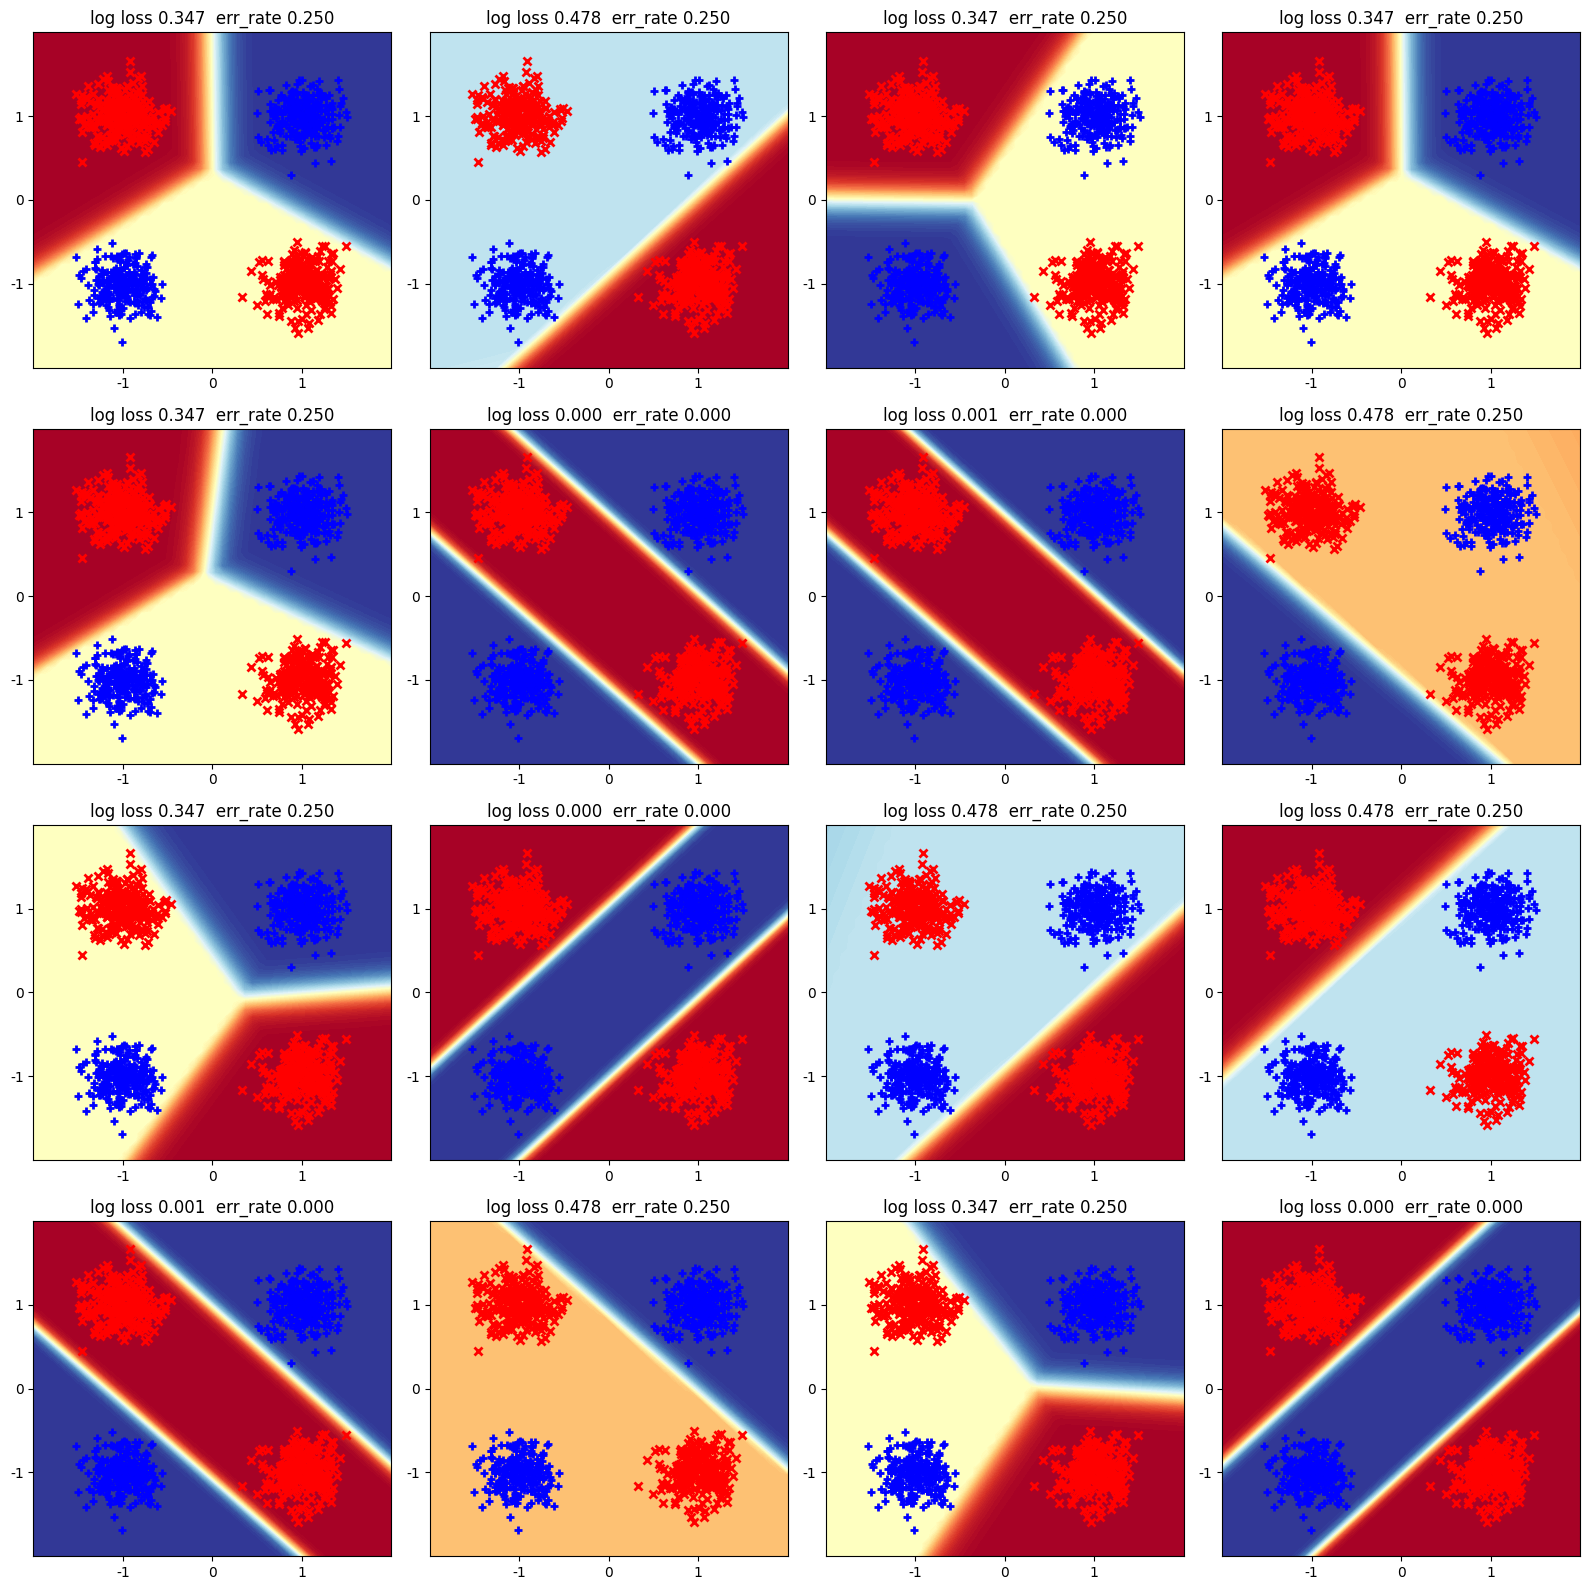

In [4]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for subplot_id, mlp in enumerate(mlprelulbfgs_list):
    cur_ax = ax_grid.flatten()[subplot_id]
    plot_pretty_probabilities_for_clf(mlp, x_tr_N2, y_tr_N, ax=cur_ax)
    
plt.tight_layout()  
plt.show()         

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 5/16 of run reach 0 training error (okay, technically 4 of them reach 0.001, but they do a darn good job of separating the two classes). The others either group an entire cluster with the wrong class (ex plot 2/16), or they place two clusters of opposite classes into the region that's meant to separate the two classes (would it be called the separating region?). 

It's very cool that clusters can be placed into the separating region. I find it interesting that the log loss is lower when the algorithm does that compared to when the algorithm creates two separating regions. I imagine the height of the loss function has several tiers, where each cluster placed into the separating hyperplane contributes loss, and each cluster incorrectly classified contributes even more loss. 

Generally, when the solver still has nonzero loss after converging, it takes around 1800 iterations to complete. When it converges with 0 training error, it takes around 3000 iterations. I do not see that this solver decreases the proportion of the gradient used for the step size over time, so the longer iteration to converge to the true minimum suggests to me that the loss curve around the true solution is steeper than that for local minima. 

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [5]:
# TODO edit this block to run 16 different random_state models with LOGISTIC activation

# Save each run's trained classifier object in a list
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list

n_runs = 16
mlplogisticlbfgs_list = []
total_elapsed_time = 0

for ii in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=9000, tol=1e-6,
        random_state=ii,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    converged = mlp_lbfgs.n_iter_ < mlp_lbfgs.max_iter
    elapsed_time_sec = time.time() - start_time_sec
    total_elapsed_time += elapsed_time_sec 
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        ii+1, n_runs, elapsed_time_sec,
        #len(mlp_lbfgs.loss_curve_),
        mlp_lbfgs.n_iter_,
        'converged   ' if converged else 'NOT converged',
        mlp_lbfgs.loss_))
    
    mlplogisticlbfgs_list.append(mlp_lbfgs)

mean_elapsed = total_elapsed_time / n_runs
print(f'mean time to finish a run: {mean_elapsed}')


finished LBFGS run  1/16 after    4.6 sec | 4556 iters | converged    | loss 0.001
finished LBFGS run  2/16 after    3.7 sec | 3612 iters | converged    | loss 0.478
finished LBFGS run  3/16 after    3.4 sec | 3383 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    5.2 sec | 5184 iters | converged    | loss 0.349
finished LBFGS run  5/16 after    3.5 sec | 3394 iters | converged    | loss 0.347
finished LBFGS run  6/16 after    4.3 sec | 4280 iters | converged    | loss 0.001
finished LBFGS run  7/16 after    4.4 sec | 4350 iters | converged    | loss 0.001
finished LBFGS run  8/16 after    4.3 sec | 4367 iters | converged    | loss 0.001
finished LBFGS run  9/16 after    3.2 sec | 3243 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    3.5 sec | 3391 iters | converged    | loss 0.347
finished LBFGS run 11/16 after    4.5 sec | 4471 iters | converged    | loss 0.001
finished LBFGS run 12/16 after    4.3 sec | 4248 iters | converged    | loss 0.001
fini

#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

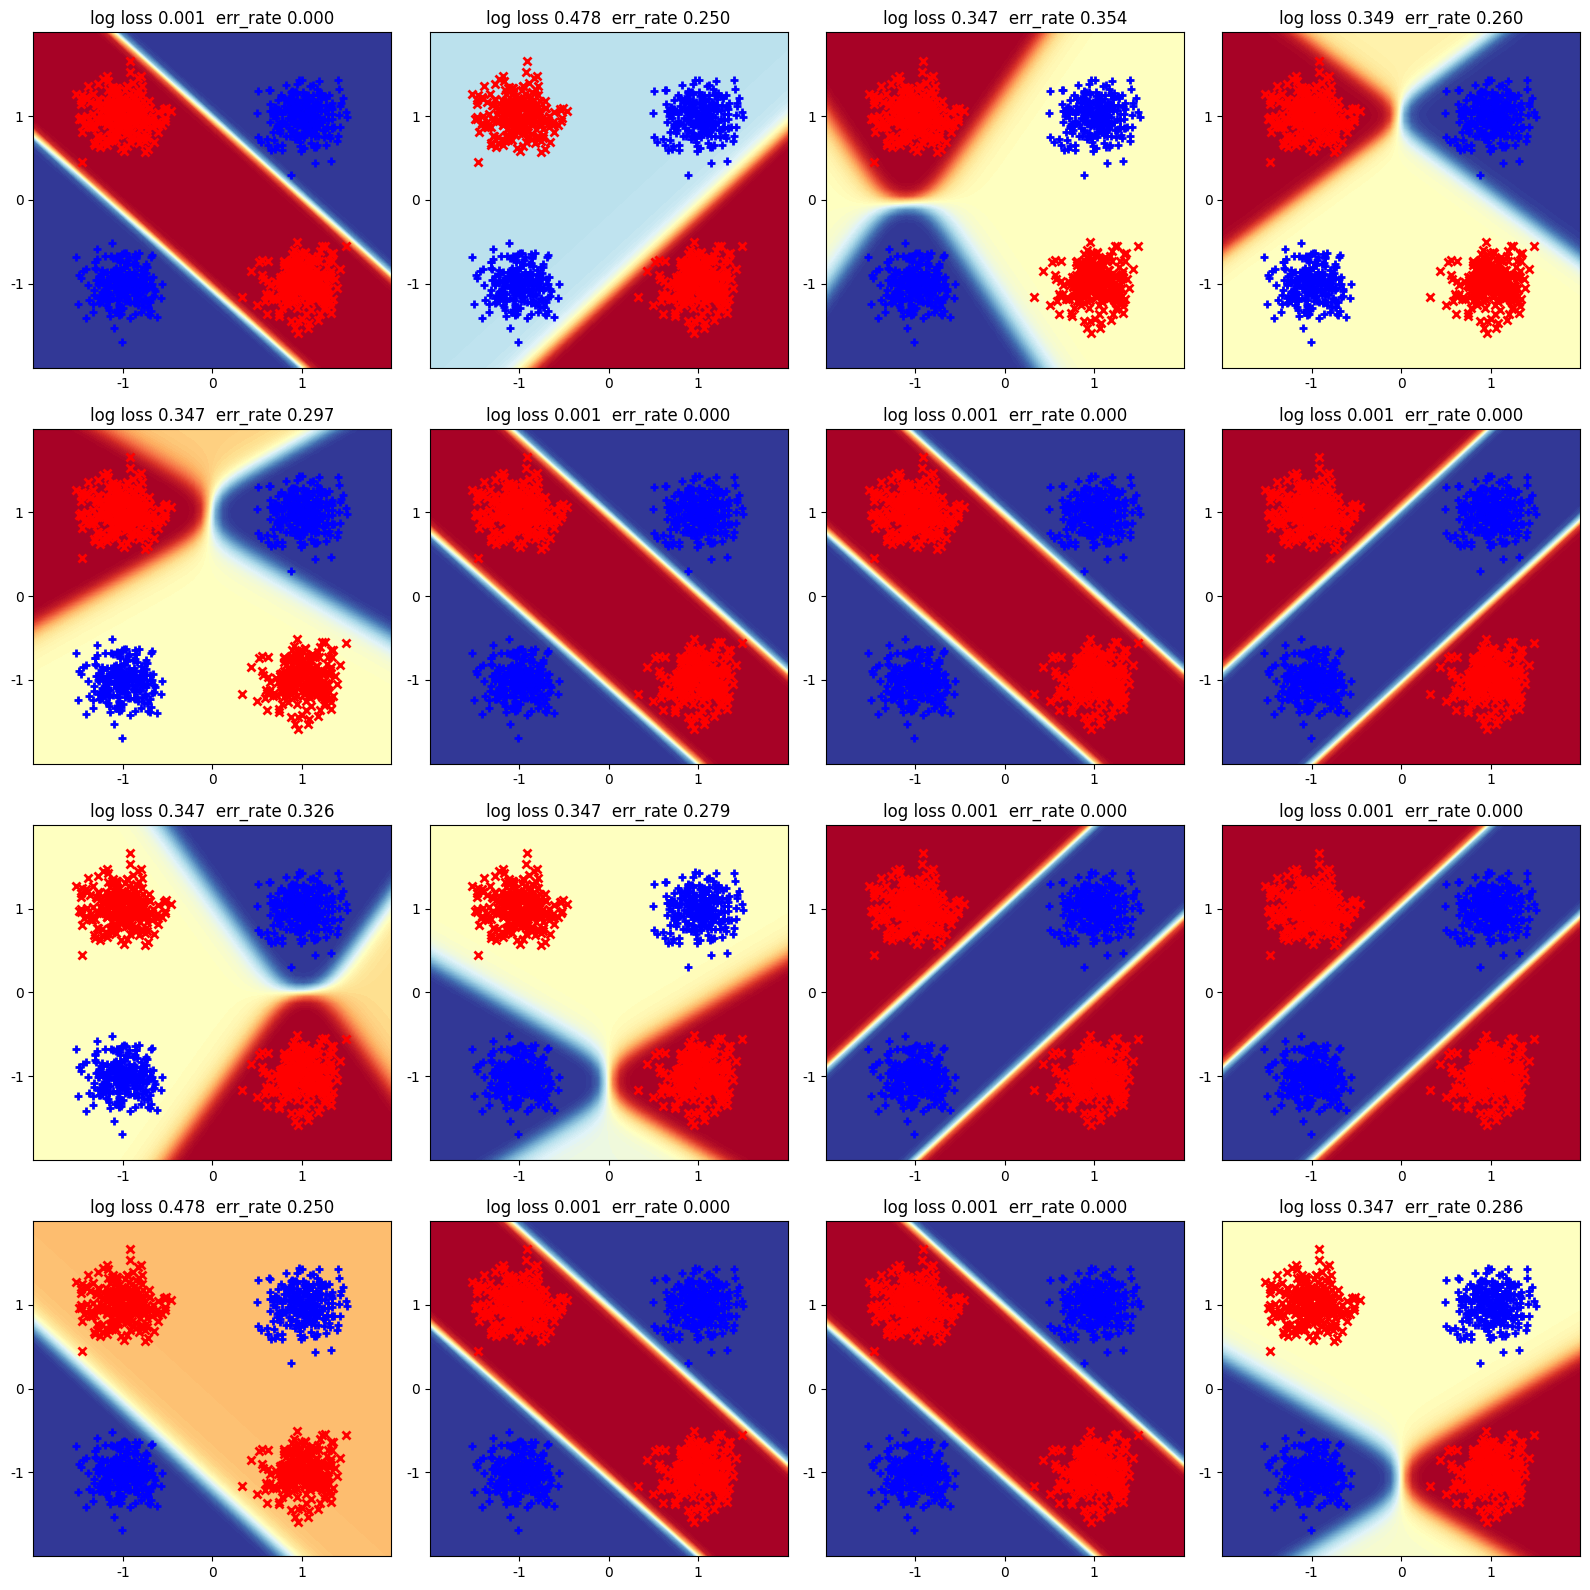

In [6]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for subplot_id, mlp in enumerate(mlplogisticlbfgs_list):
    cur_ax = ax_grid.flatten()[subplot_id]
    plot_pretty_probabilities_for_clf(mlp, x_tr_N2, y_tr_N, ax=cur_ax)
    
plt.tight_layout()  
plt.show()         

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 8/16 of the runs reach 0 training error. the others exhibit similar behavior as with the ReLU activation, though the shape of the separating region is different in cases where a red and blue cluster are placed into the separating region.

A big difference with sigmoid activation is that we're seeing different error rate levels between initializations that end up with comparable classification structure. For example, looking at plots (1,0) and (2,0), we see that both solutions have a log loss of 0.347, but the error rates are 0.297 and 0.326. i would guess this has to do with the differentiability of the logistic function- there is no point at which sigmoid turns on like what reLU does.

This time, the iterations to convergence for local minima and for optimal solutions is much more varied and mixed. Also, the time to completion is much higher than that of ReLU - mean time is 3.98s vs. 2.24s

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [7]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list 

n_runs = 16
mlp_relu_sgd_list = []

for ii in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=9000, tol=1e-8,
        random_state=ii,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        ii+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    
    mlp_relu_sgd_list.append(mlp_sgd)


finished SGD run  1/16 after    3.6 sec | 267 epochs | converged     | loss 0.347
finished SGD run  2/16 after    4.2 sec | 307 epochs | converged     | loss 0.478
finished SGD run  3/16 after    3.3 sec | 239 epochs | converged     | loss 0.347
finished SGD run  4/16 after   27.5 sec | 2009 epochs | converged     | loss 0.001
finished SGD run  5/16 after    3.9 sec | 275 epochs | converged     | loss 0.347
finished SGD run  6/16 after   22.5 sec | 1653 epochs | converged     | loss 0.001
finished SGD run  7/16 after   23.0 sec | 1684 epochs | converged     | loss 0.001
finished SGD run  8/16 after    3.6 sec | 273 epochs | converged     | loss 0.347
finished SGD run  9/16 after    3.0 sec | 219 epochs | converged     | loss 0.347
finished SGD run 10/16 after   47.9 sec | 3485 epochs | converged     | loss 0.001
finished SGD run 11/16 after    5.4 sec | 394 epochs | converged     | loss 0.478
finished SGD run 12/16 after    6.4 sec | 470 epochs | converged     | loss 0.478
finished SGD

In [8]:
# manually calculating mean time: 13.29s per run

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

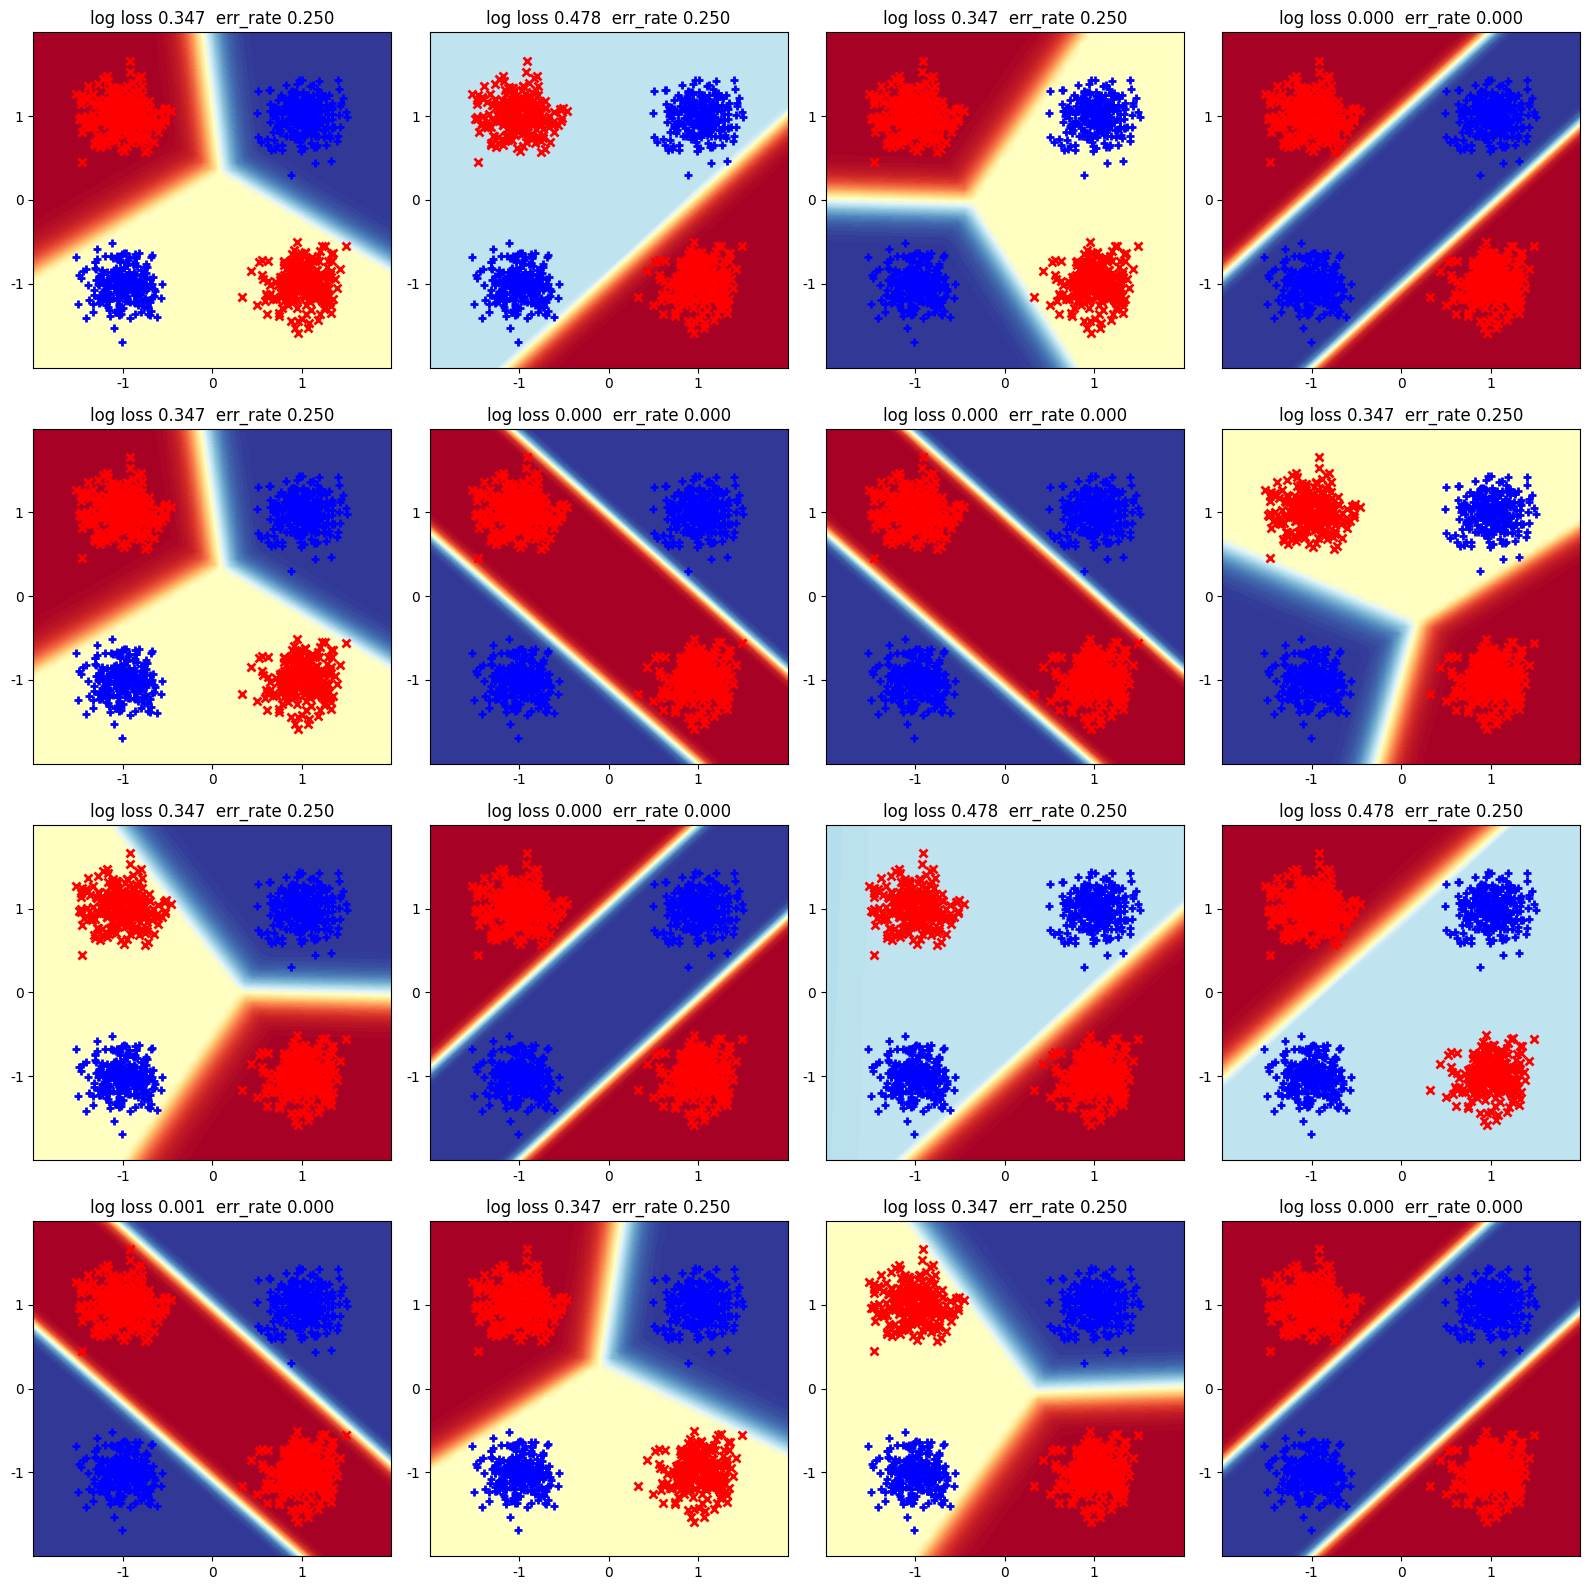

In [9]:
# TODO edit to plot all 16 runs from above

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for subplot_id, mlp in enumerate(mlp_relu_sgd_list):
    cur_ax = ax_grid.flatten()[subplot_id]
    plot_pretty_probabilities_for_clf(mlp, x_tr_N2, y_tr_N, ax=cur_ax)

plt.tight_layout()  
plt.show()          

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 6/16 runs reach 0 training error. some of the random states take quite a while to converge. but those are the cases where the training error reaches 0. perhaps this means that SGD takes more time to get to the correct answer. i wonder why the convergence times are so low when the training loss is not 0 - does this mean that the local minima in the loss function tend to be much shallower than minima associated with an actual optimal solution? my reasoning for this is that shallow depths can make the algorithm think it's converged already when it actually hasn't. the shallowness also acts as a wide net which makes it harder for the algorithm to "escape" the local minimum. 

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**: Way more clusters get placed into the separating region for the SGD with batch size 10. my guess is that this is an intermedite solution (local minima) which the stochasticness has a tendency to graviate towards.

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [10]:
# TODO edit to do 16 runs of SGD, like in previous step, but with LOGISTIC activation
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list 

n_runs = 16
mlp_log_sgd_list = []
total_time = 0

for ii in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=9000, tol=1e-8,
        random_state=ii,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    total_time += elapsed_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        ii+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    
    mlp_log_sgd_list.append(mlp_sgd)

finished SGD run  1/16 after    2.3 sec | 161 epochs | converged     | loss 0.693
finished SGD run  2/16 after   48.3 sec | 3532 epochs | converged     | loss 0.004
finished SGD run  3/16 after   35.1 sec | 2598 epochs | converged     | loss 0.004
finished SGD run  4/16 after    2.9 sec | 215 epochs | converged     | loss 0.693
finished SGD run  5/16 after   22.2 sec | 1653 epochs | converged     | loss 0.351
finished SGD run  6/16 after   33.0 sec | 2416 epochs | converged     | loss 0.004
finished SGD run  7/16 after   36.7 sec | 2710 epochs | converged     | loss 0.004
finished SGD run  8/16 after    5.9 sec | 436 epochs | converged     | loss 0.351
finished SGD run  9/16 after    8.7 sec | 636 epochs | converged     | loss 0.351
finished SGD run 10/16 after   10.7 sec | 803 epochs | converged     | loss 0.351
finished SGD run 11/16 after    1.7 sec | 124 epochs | converged     | loss 0.693
finished SGD run 12/16 after   48.4 sec | 3594 epochs | converged     | loss 0.004
finished S

In [11]:
mean_elapsed = total_time / n_runs
print(f'mean time to finish a run: {mean_elapsed}')


mean time to finish a run: 27.55560851097107


#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

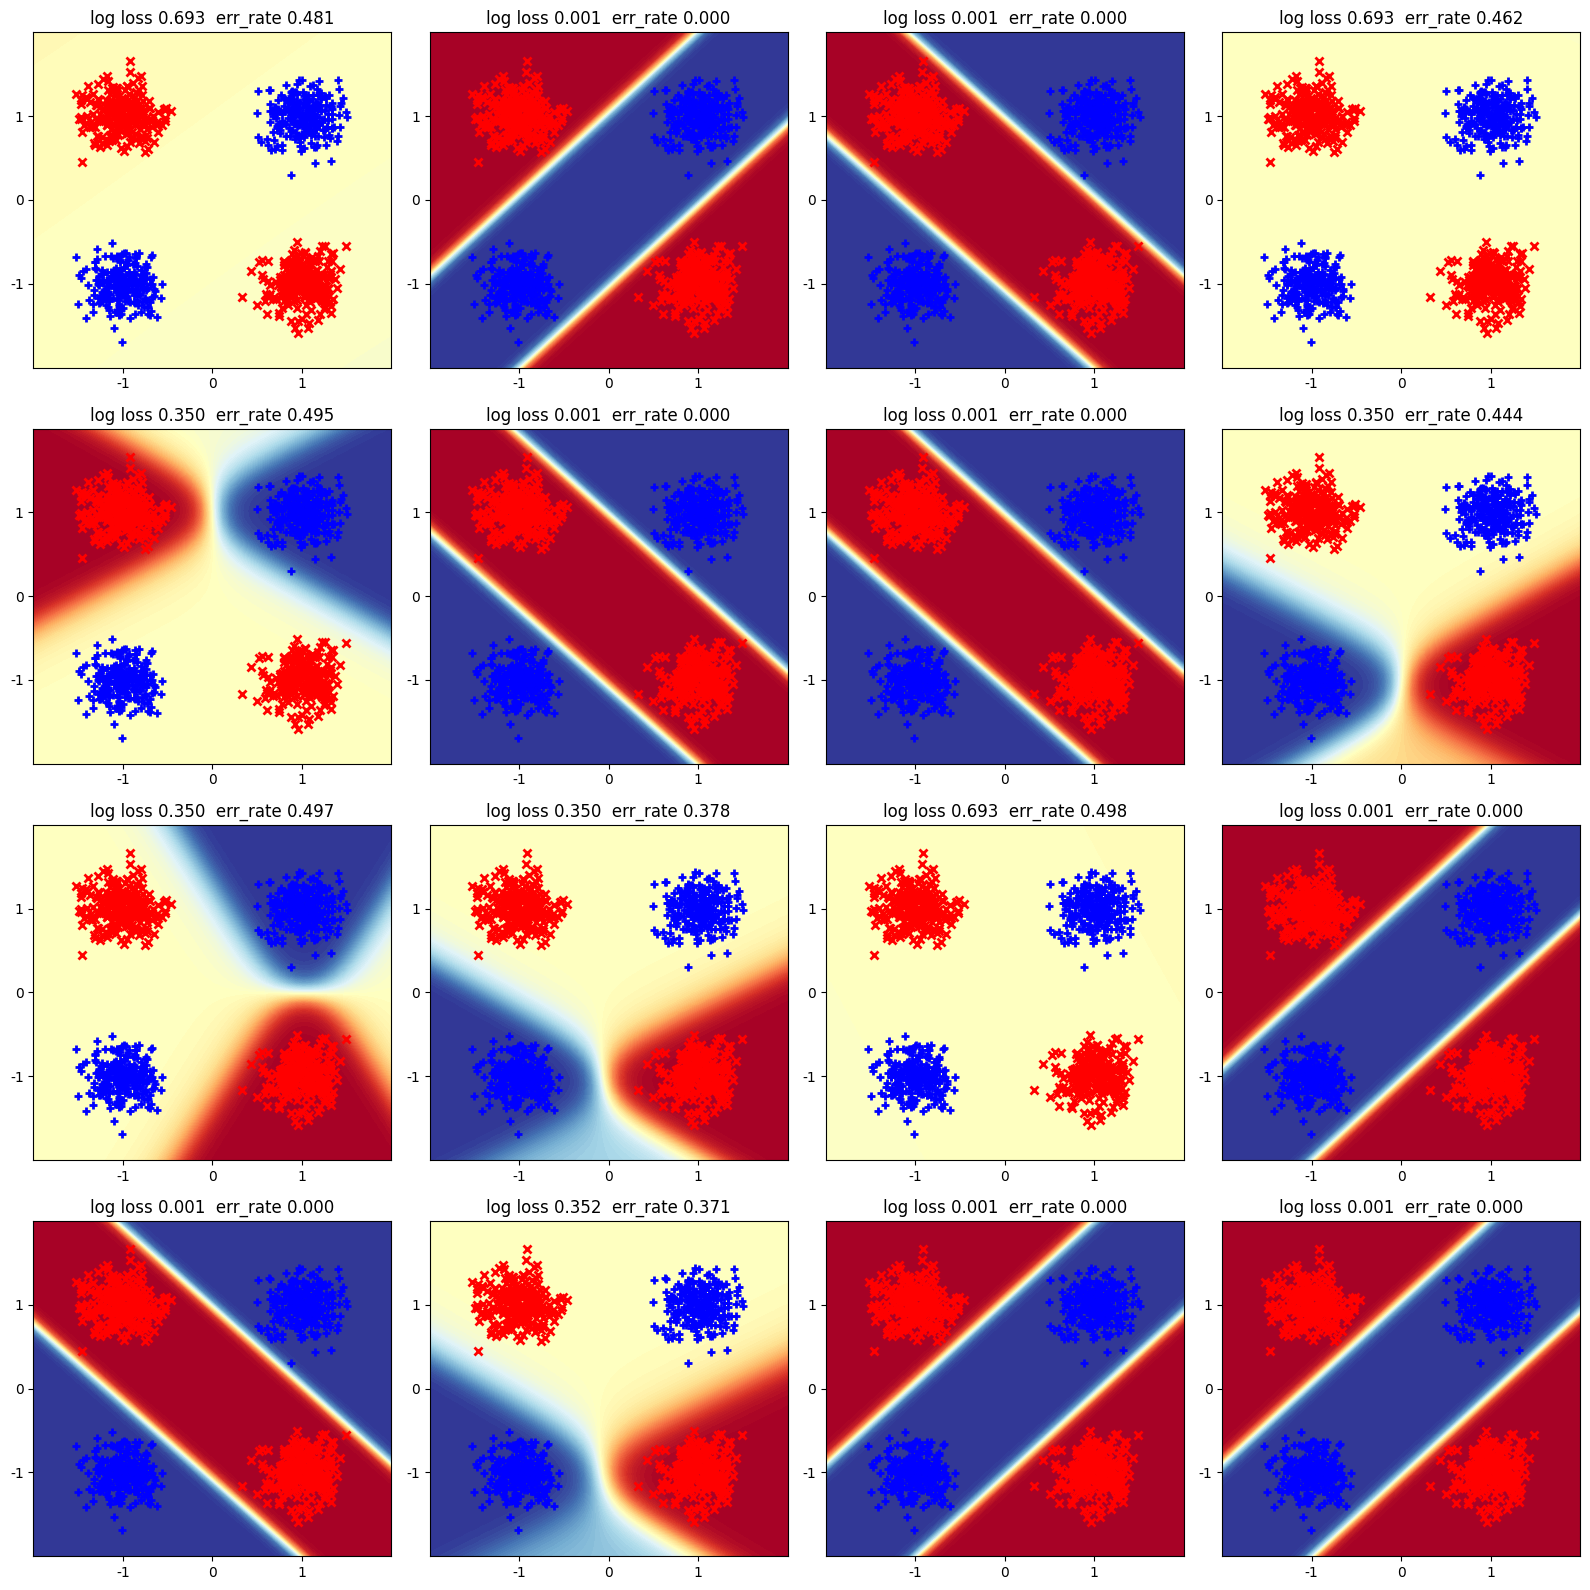

In [12]:
# TODO edit to plot all 16 runs from previous step

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for subplot_id, mlp in enumerate(mlp_log_sgd_list):
    cur_ax = ax_grid.flatten()[subplot_id]
    plot_pretty_probabilities_for_clf(mlp, x_tr_N2, y_tr_N, ax=cur_ax)

plt.tight_layout()  
plt.show()    

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 8/16 reach 0 training error. The behavior with the others is quite varied. we get instances like in ReLU + SGD where two clusters get placed into the separating region. However, we also get instances where the entire plotted space is considered a separating region, and correspondingly, the log loss is 0.693, which is a proportional increase in loss for clusters placed into the separating region. I am also seeing some solutions where the transition from the separating region to the classification region is much more gradual. it seems that the sigmoid 

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**: Way more clusters get placed into the separating region with SGD. Also, the transition from separating region to classification region is sometimes much shallower. 

### Problem 5: Plot SGD Loss Curves

#### 5 (a): Plot Logistic and ReLU Loss Curved in 1 x 2 subplot grid

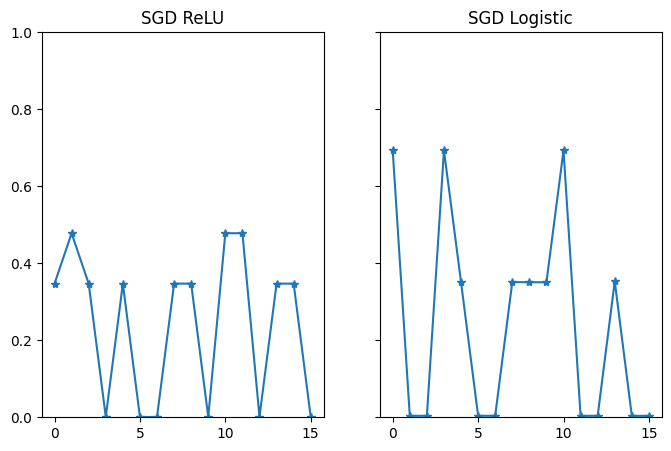

In [13]:
fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,5))

# TODO plot 16 curves for each of the 1x2 settings of solver and activation    
ax_grid[0].set_title('SGD ReLU')
ax_grid[1].set_title('SGD Logistic')
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

mlp_log_sgd_list
mlp_relu_sgd_list

log_sgd_losses = [mlp.loss_ for mlp in mlp_log_sgd_list]
relu_sgd_losses = [mlp.loss_ for mlp in mlp_relu_sgd_list]

relu_ax = ax_grid[0]
log_ax  = ax_grid[1]
relu_ax.plot(relu_sgd_losses, marker='*')
log_ax.plot(log_sgd_losses, marker='*')

#### 5 (b): Based on your iteration and timing data, which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

**Answer:** Given that the ReLU activation function required 13.3s per run on average and the Logistic Sigmoid function required 26.8s per run on average, ReLU clearly seems easier to optimize. The Logistic Sigmoid requires more iterations in general.

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: I am not convinced that one activation function is always easier to optimize than the other. Logistic sigmoid has a better 0 training loss hit rate. If the goal was to find a solution that could classify the 4 clusters correctly, then I would take the activation function which has a better chance of getting me a good solution. The thought process is that, if i tried many different initializations, it'd take me less time to find a good solution with logistic sigmoid in this case. ReLU does have the advantage that the maximum training loss ever encountered is capped. perhaps this has utility in knowing what loss an optimal solution looks like. if we have a solution with ReLU which gives us 0.4 loss, then getting the larger 0.7 loss with logistic sigmoid would tell us immediately that we need to adjust some parameters. In this regard, trying different activation functions as a sort of sanity check is a good idea. 

1) do more random state trials for each activation function to confirm the statistics found in earlier problems regarding percentage of 0 training loss, medium training loss, and high training loss.
2) try a harder problem, for example with more clusters where the solution requires more divisions than in current problems
3) another harder problem would be moving some of the clusters cleser so that the gap between them is smaller. I'm curious what effect that has on how effective each activation function is. 